<a href="https://colab.research.google.com/github/Kanyarat-S/DWDM21/blob/main/Chap8_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##K-means

###Generate Data

In [1]:
from sklearn.datasets import make_blobs

In [2]:
X, y = make_blobs(n_samples=500, centers=3, n_features=2,random_state=6)

###Explore data 

In [3]:
X.shape

(500, 2)

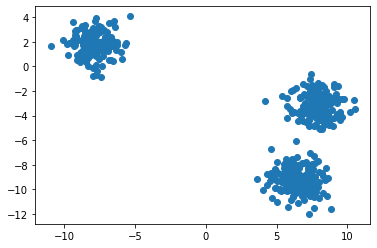

In [4]:
from matplotlib import pyplot as plt 
plt.scatter(X[:,0],X[:,1])

###Clustering

####Import

In [5]:
from sklearn.cluster import KMeans

####Define

In [6]:
kmeans = KMeans(n_clusters=2, random_state=6)

####Fit-Predict

In [7]:
y_clust = kmeans.fit_predict(X)

In [8]:
y_clust

array([1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,

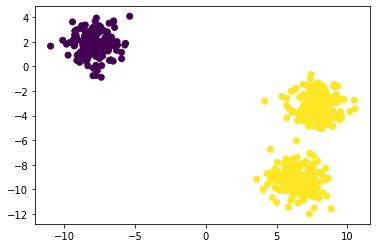

In [9]:
plt.scatter(X[:,0],X[:,1],c=y_clust)


3 clusters

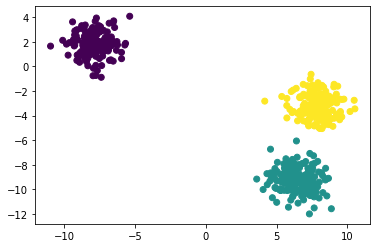

In [10]:
#define
kmeans = KMeans(n_clusters=3, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)


4 clusters

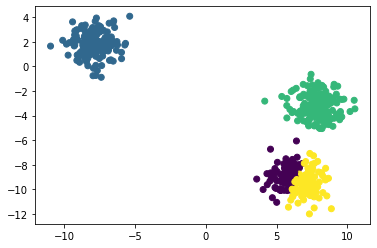

In [11]:
#define
kmeans = KMeans(n_clusters=4, random_state=6)
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

5 clusters

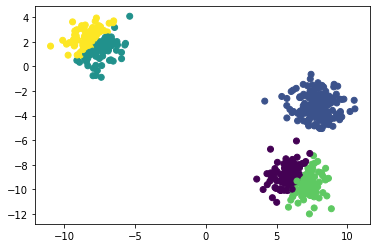

In [12]:
#define
kmeans = KMeans(n_clusters=5, random_state=14, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

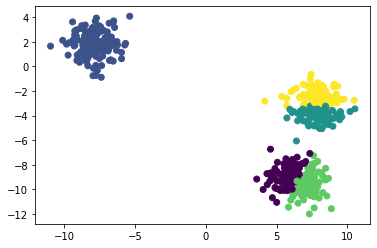

In [13]:
#define
kmeans = KMeans(n_clusters=5, random_state=6, init = 'random')
#fit-predict
y_clust = kmeans.fit_predict(X)
#plot
plt.scatter(X[:,0],X[:,1],c=y_clust)

##Example Application (Color Quantization)

In [14]:
import cv2
import os

In [35]:
img = cv2.imread('/content/Cgv2GKoU0AAQeoN.jpg')

In [36]:
img.shape

(599, 639, 3)

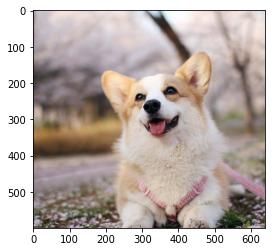

In [37]:
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(RGB_img)

##นับจำนวนสี

In [38]:
import numpy as np

In [39]:
np.unique(np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3)),axis=0).shape

(73462, 3)

##จัดกลุ่มสีให้เหลือ 16 สี

In [40]:
myquantize = KMeans(n_clusters=16,random_state=6)

แปลงข้อมูลให้อยู่ในรูป row-column

In [41]:
img_row = np.reshape(RGB_img,(RGB_img.shape[0]*RGB_img.shape[1],3))
img_row.shape

(382761, 3)

In [42]:
final_color = myquantize.fit_predict(img_row)

##ใช้ centroid เป็นตัวแทนของสี

In [43]:
centroid = myquantize.cluster_centers_

In [44]:
centroid

array([[180.9118783 , 166.60936323, 166.66136021],
       [ 95.83028381,  78.73801851,  62.42655162],
       [224.68907587, 213.9490856 , 212.09215535],
       [150.2517452 , 135.59914921, 131.49850931],
       [196.98431594, 183.75590502, 179.58158428],
       [132.65808181, 118.46476013, 112.24653695],
       [ 25.93408113,  24.55039951,  21.22649047],
       [112.9582938 ,  98.75847494,  91.13016475],
       [167.50407709, 151.34954464, 149.58715451],
       [204.5443782 , 172.68091359, 144.10555042],
       [180.31086356, 144.8435685 , 107.48262401],
       [150.7179511 , 111.78711537,  76.39471972],
       [235.81621321, 204.47429206, 171.35358134],
       [ 64.5736982 ,  53.78079946,  43.20195624],
       [208.73689105, 197.61054159, 195.86208382],
       [241.63470568, 235.46233413, 235.18237496]])

แทนสีคืนลงไป

In [45]:
new_img = np.zeros(RGB_img.shape)
for i in range(RGB_img.shape[0]):
    for j in range(RGB_img.shape[1]):
        new_img[i,j,:] = centroid[myquantize.predict([RGB_img[i,j,:]]),:]

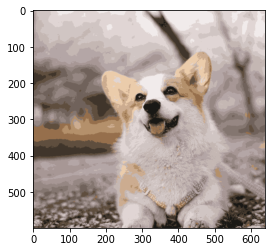

In [46]:
plt.imshow(new_img/255)

In [47]:
plt.imsave('img.jpg',new_img/255)

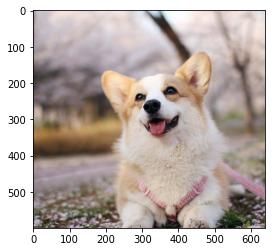

In [48]:
plt.imshow(RGB_img)